## TASK 3 : Cat and Dog Image Classifier 

### Develop an image classification model to distinguish between images of cats and dogs using data science techniques in Python.

#### Import necessary libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

#### Define paths to the dataset

In [2]:
train_dir = 'C:/Users/HP/Downloads/Internship Certificates/Bharat Intern/Train'
test_dir = 'C:/Users/HP/Downloads/Internship Certificates/Bharat Intern/Test'
cat_path = os.path.join(train_dir, 'C:/Users/HP/Downloads/Internship Certificates/Bharat Intern/Train/Cat')
dog_path = os.path.join(train_dir, 'C:/Users/HP/Downloads/Internship Certificates/Bharat Intern/Train/Dog')

#### Function to load images and labels

In [3]:
def load_images_and_labels(cat_path, dog_path):
    images = []
    labels = []
    # Load cat images
    for img_name in os.listdir(cat_path):
        img = cv2.imread(os.path.join(cat_path, img_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = cv2.resize(img, (100, 100))  # Resize to a common size
        images.append(img)
        labels.append(0)  # Cat label is 0
    # Load dog images
    for img_name in os.listdir(dog_path):
        img = cv2.imread(os.path.join(dog_path, img_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (100, 100))
        images.append(img)
        labels.append(1)  # Dog label is 1
    return np.array(images), np.array(labels)

#### Load images and labels

In [4]:
X, y = load_images_and_labels(cat_path, dog_path)

#### Split the data into train and validation sets

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### Data preprocessing and augmentation

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

#### Define the model architecture

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

#### Compile the model

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Train the model

In [9]:
history = model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=32),
                              steps_per_epoch=len(X_train)/32, epochs=20,
                              validation_data=val_datagen.flow(X_val, y_val, batch_size=32),
                              validation_steps=len(X_val)/32)


<ipython-input-9-028b8f7d2ffb>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=32),


Epoch 1/20
28/28 [==============================] - 8s 268ms/step - loss: 0.6965 - accuracy: 0.5364 - val_loss: 0.6880 - val_accuracy: 0.6104
Epoch 2/20
28/28 [==============================] - 7s 253ms/step - loss: 0.6751 - accuracy: 0.5917 - val_loss: 0.6584 - val_accuracy: 0.6753
Epoch 3/20
28/28 [==============================] - 7s 258ms/step - loss: 0.6493 - accuracy: 0.6482 - val_loss: 0.6654 - val_accuracy: 0.5801
Epoch 4/20
28/28 [==============================] - 8s 265ms/step - loss: 0.6291 - accuracy: 0.6374 - val_loss: 0.6381 - val_accuracy: 0.6710
Epoch 5/20
28/28 [==============================] - 8s 279ms/step - loss: 0.6134 - accuracy: 0.6710 - val_loss: 0.6388 - val_accuracy: 0.6667
Epoch 6/20
28/28 [==============================] - 8s 289ms/step - loss: 0.6079 - accuracy: 0.6786 - val_loss: 0.6269 - val_accuracy: 0.6753
Epoch 7/20
28/28 [==============================] - 8s 277ms/step - loss: 0.5961 - accuracy: 0.6764 - val_loss: 0.6679 - val_accuracy: 0.6061
Epoch 

#### Plot training history

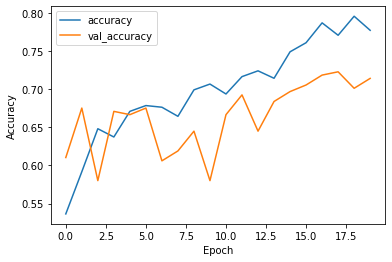

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Evaluate the model

In [11]:
X_test = []
y_test = []
# Load test images
for img_name in os.listdir(test_dir):
    img = cv2.imread(os.path.join(test_dir, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (100, 100))
    X_test.append(img)
    if 'cat' in img_name:
        y_test.append(0)
    else:
        y_test.append(1)

X_test = np.array(X_test)
y_test = np.array(y_test)

#### Preprocess test data

In [12]:
X_test = X_test / 255.0

#### Make predictions

In [14]:
predictions = model.predict(X_test)
predictions = np.round(predictions).astype(int)

1/1 [==============================] - 0s 127ms/step


#### Calculate accuracy

In [15]:
accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", accuracy)

Test Accuracy: 1.0


#### Generate confusion matrix and classification report

In [16]:
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1 0]
 [0 1]]


In [17]:
class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

